# Herramienta visual para los casos simulados del Semáforo de Riesgos

Primero importamos las librerias y convertimos los casos a dataframes para su mejor manejo.


In [4]:
from geopy.geocoders import Nominatim
import pandas as pd
import reverse_geocoder as rg
data = pd.read_csv("casos_simulados.csv") 
data.head()

,Mag,Slat,Slong,dfis,dsen,U,Plat,Plong,P,V,IR,Sem
0,4.0,16.75,-99.46,0.5,1.5,1.5,19.70078,-101.18443,2,4.0,3.00,verde
1,4.0,16.75,-99.46,2.5,2.5,1.0,18.92610,-99.23075,2,7.0,4.50,verde
2,4.0,16.75,-99.46,2.5,1.5,0.5,16.84942,-99.90891,2,7.0,4.50,verde
3,4.0,16.75,-99.46,1.0,1.5,1.0,19.03793,-98.20346,2,4.5,3.25,verde
4,4.0,16.75,-99.46,1.0,2.5,1.5,19.70078,-101.18443,2,5.5,3.75,verde


Las columnas representan los siguientes valores:
### Sismo o V1
* Mag: Magnitud del sismo.
* Slat: Latitud del epicentro del sismo
* Slong: Longitud del epicentro del sismo
### Persona o V2 
* dfis: Características fisiologicas.
* dsen: Características sensoriales.
* U: Ubicación de la persona en relación al sismo.
* Plat: Latitud de la persona.
* Plong: Longitud de la persona.
### Peligro
* P: Índice de peligro
### Vulnerabilidad
* V: Índice de Vulnerabilidad
### Índice de Riesgo
* IR: Índice de Riesgo
### Semáforo de Riesgo
* Sem: Color del Semáforo

Para una mejor visualización se cambiarán los datos de geolocalización a ciudades.
Creare otro DataFrame para visualizar los epicentros y las ubicaciones de los usuarios.

In [3]:
def get_city(lat,long):
    loc = rg.search((lat,long))
    return loc[0]['name'],loc[0]['admin1']


In [5]:
df2= pd.DataFrame(data.apply(lambda row: get_city(row.Slat,row.Slong),axis=1),columns=['Epicentro'])
df2['Ubicacion_Persona']=data.apply(lambda row: get_city(row.Plat,row.Plong),axis=1)
df2.insert(0,'Magnitud',data.Mag)
df2['Semaforo'] = data.Sem
df2.head()


Loading formatted geocoded file...


,Magnitud,Epicentro,Ubicacion_Persona,Semaforo
0,4.0,"(Llano de la Puerta, Guerrero)","(Morelia, Michoacan)",verde
1,4.0,"(Llano de la Puerta, Guerrero)","(Cuernavaca, Morelos)",verde
2,4.0,"(Llano de la Puerta, Guerrero)","(Acapulco de Juarez, Guerrero)",verde
3,4.0,"(Llano de la Puerta, Guerrero)","(Puebla, Puebla)",verde
4,4.0,"(Llano de la Puerta, Guerrero)","(Morelia, Michoacan)",verde


### Visualización

<AxesSubplot:xlabel='Semaforo', ylabel='Magnitud'>

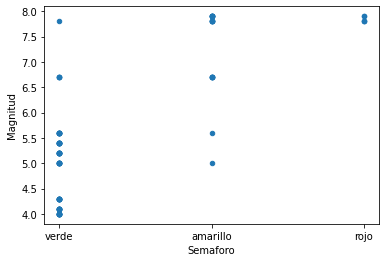

In [14]:
df2.plot(kind='scatter',x='Semaforo',y='Magnitud')

Podemos buscar casos particulares como el sismo de magnitud > 7.5 y  que resultó en semáforo verde.

In [18]:
df2.loc[(df2.Magnitud > 7.5)&(df2.Semaforo == 'verde')]

,Magnitud,Epicentro,Ubicacion_Persona,Semaforo
65,7.8,"(La Resolana, Jalisco)","(Tuxtla Gutierrez, Chiapas)",verde


Un sismo de magnitud mayor a 7 es considerado altamente peligroso, para comprender el color del semáforo consideremos cada una de las variables de este caso.